In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/dataset.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   name                            20758 non-null  object 
 2   host_id                         20758 non-null  int64  
 3   host_name                       20758 non-null  object 
 4   neighbourhood_group             20758 non-null  object 
 5   neighbourhood                   20758 non-null  object 
 6   latitude                        20758 non-null  float64
 7   longitude                       20758 non-null  float64
 8   room_type                       20758 non-null  object 
 9   price                           20758 non-null  float64
 10  minimum_nights                  20758 non-null  int64  
 11  number_of_reviews               20758 non-null  int64  
 12  last_review                     

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,beds
count,2.075800e+04,2.075800e+04,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,3.034044e+17,1.749316e+08,40.726798,-73.939161,187.776616,28.558435,42.642596,1.257910,18.844108,205.990317,10.852105,1.723721
std,3.901216e+17,1.725541e+08,0.060294,0.061403,1022.797208,33.536518,73.561654,1.904661,70.910834,135.087768,21.357071,1.212272
min,2.595000e+03,1.678000e+03,40.500314,-74.249840,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000,0.000000,1.000000
25%,2.708808e+07,2.041738e+07,40.684150,-73.980710,80.000000,30.000000,4.000000,0.210000,1.000000,87.000000,1.000000,1.000000
50%,4.993003e+07,1.087271e+08,40.722820,-73.949587,125.000000,30.000000,14.000000,0.650000,2.000000,215.000000,3.000000,1.000000
75%,7.216019e+17,3.144102e+08,40.763098,-73.917460,199.000000,30.000000,49.000000,1.800000,5.000000,353.000000,15.000000,2.000000
max,1.054376e+18,5.504035e+08,40.911147,-73.713650,100000.000000,1250.000000,1865.000000,75.490000,713.000000,365.000000,1075.000000,42.000000


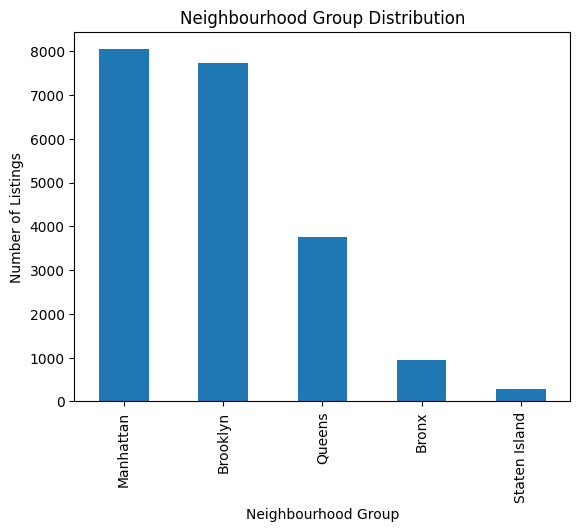

In [10]:
fig = pd.Series(df["neighbourhood_group"]).value_counts().plot(kind = "bar")
fig.set_title("Neighbourhood Group Distribution")
fig.set_ylabel("Number of Listings")
fig.set_xlabel("Neighbourhood Group")
plt.show()

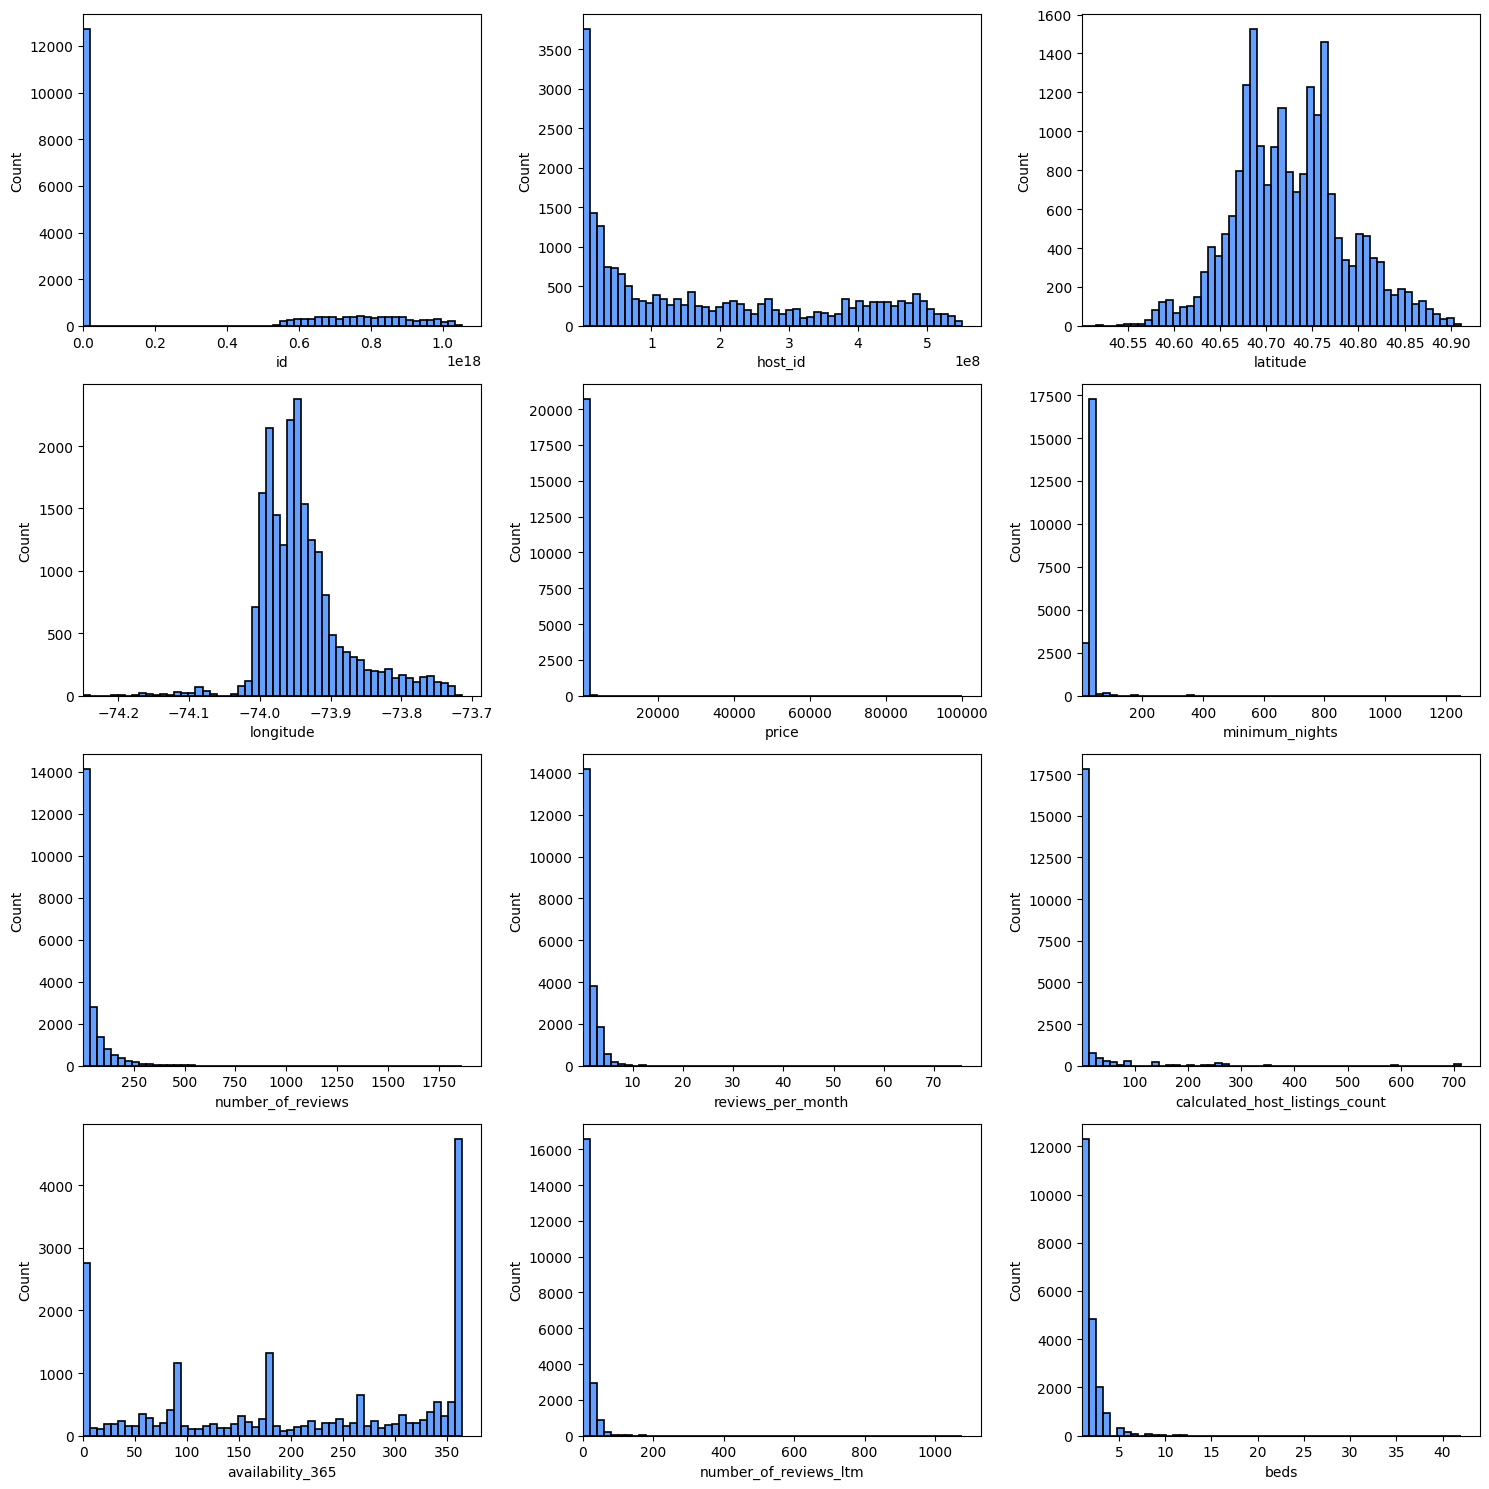

In [22]:
numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_features):
    sns.histplot(df[col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    axs[i].set_xlim(left=min(df[col]))
plt.tight_layout()


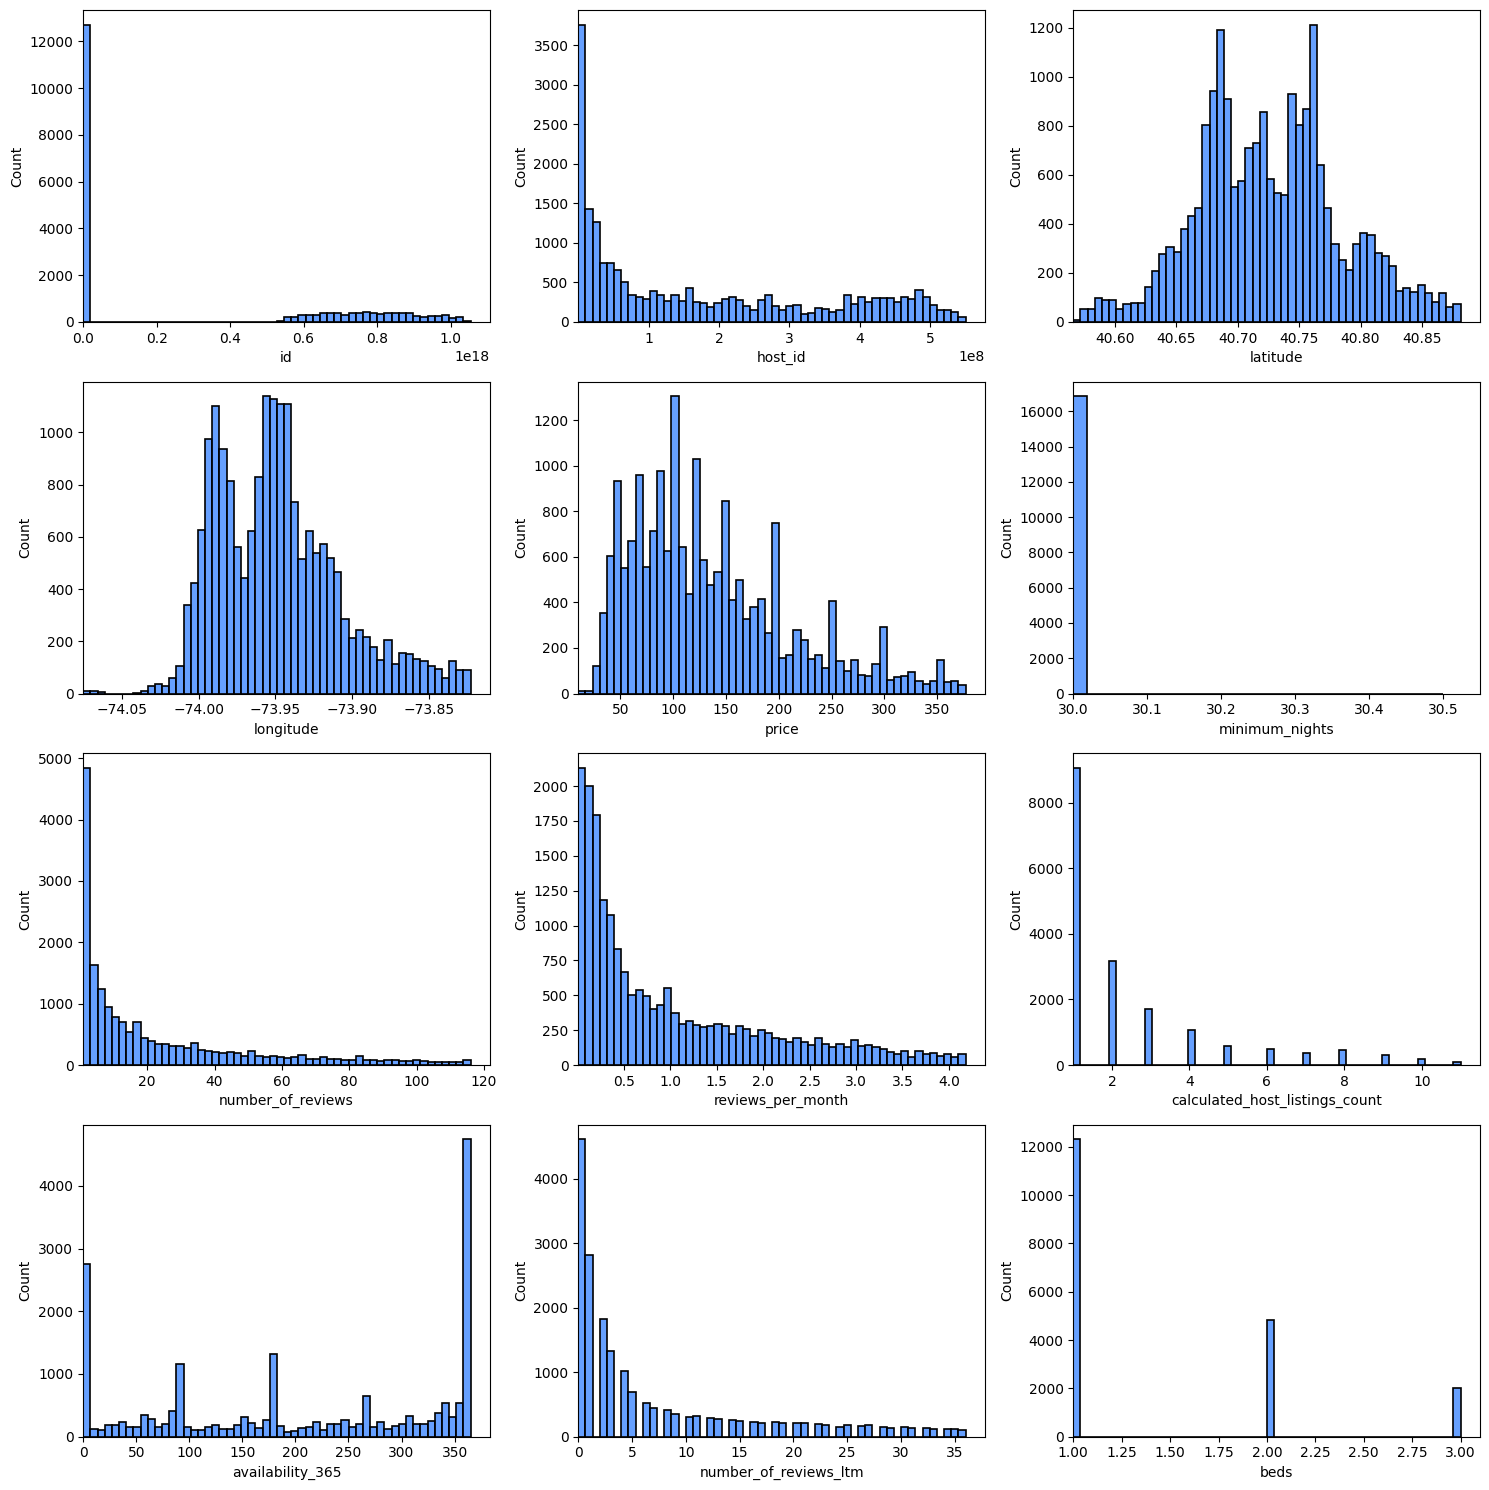

In [23]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]
    return df_out

numeric_features = df.select_dtypes(include=[np.number]).columns.to_list()
fig, axs = plt.subplots(4, 3, figsize=(15, 15))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_features):
    df_no_outliers = remove_outliers(df, col) 
    sns.histplot(df_no_outliers[col], ax=axs[i], bins=k2, color='#3381ff', edgecolor='black', linewidth=1.2)
    axs[i].set_xlim(left=min(df_no_outliers[col]))

plt.tight_layout()

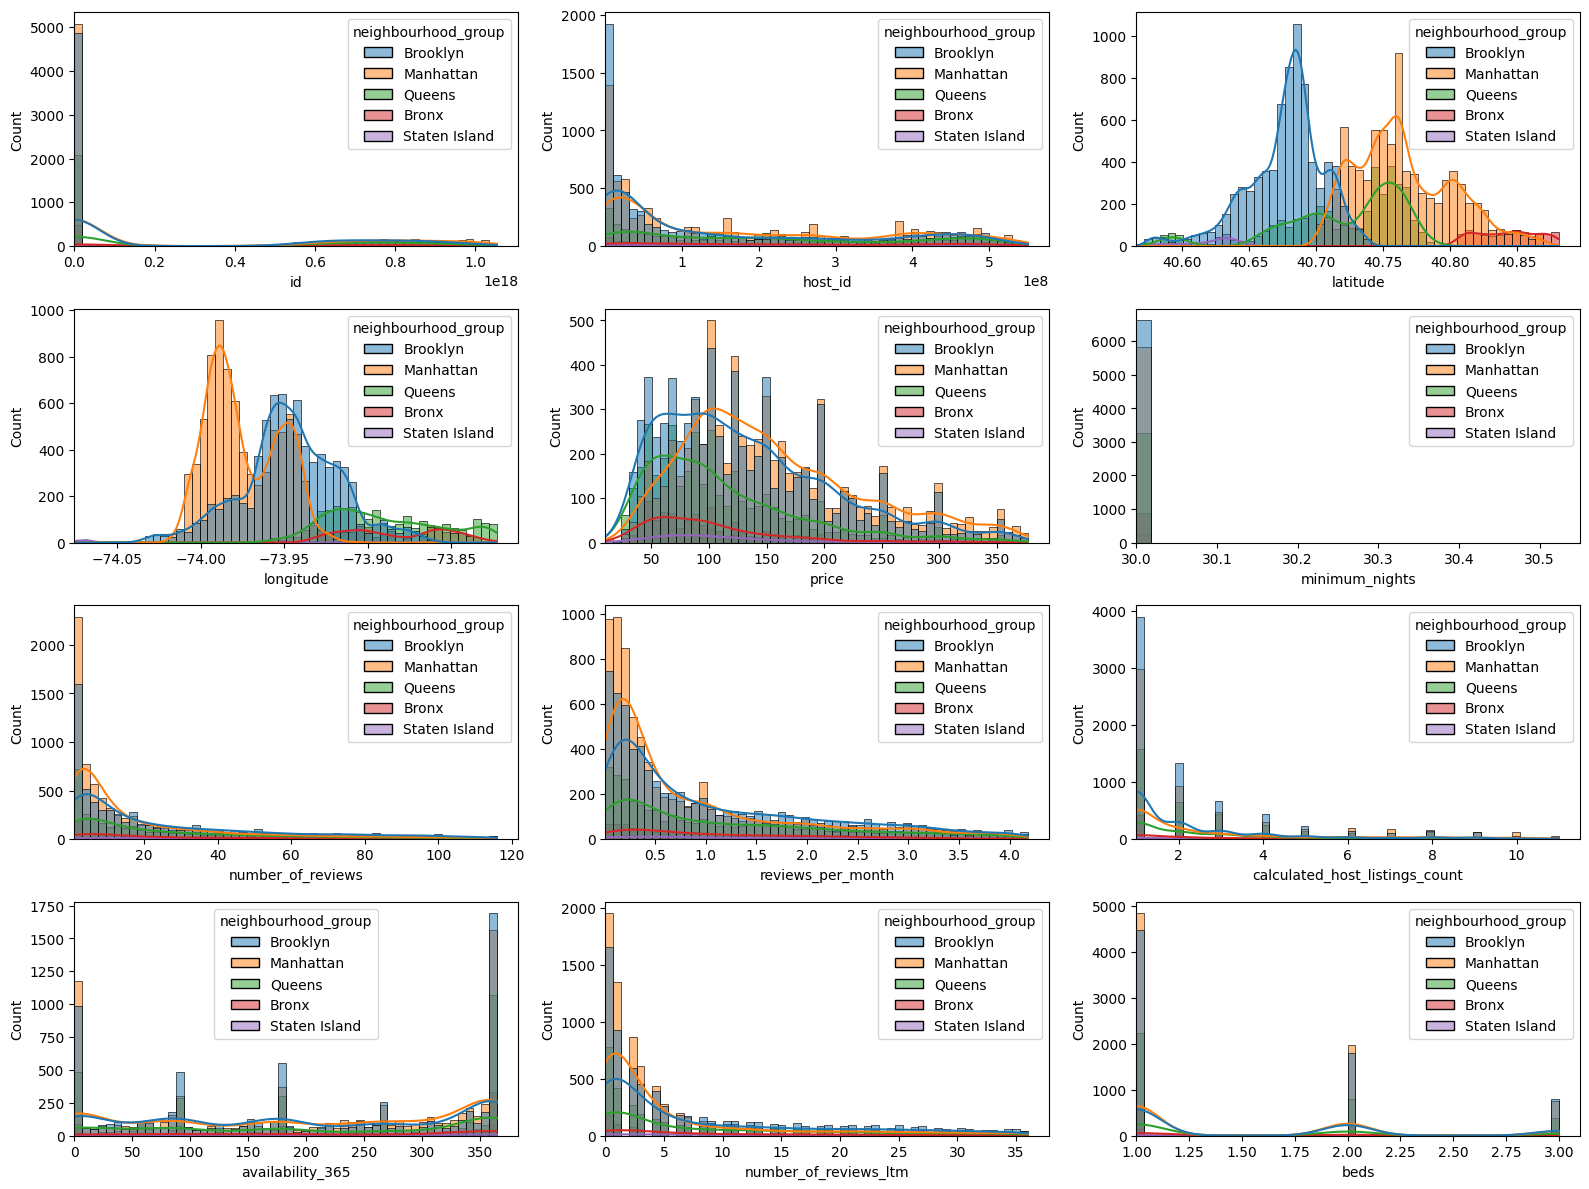

In [25]:
fig, axs = plt.subplots(4, 3, figsize=(16, 12))
axs = axs.flatten()
k = np.floor(np.sqrt(df.shape[0])).astype(int)
k2 = np.floor(2*np.cbrt(df.shape[0])).astype(int)
for i, col in enumerate(numeric_features):
    df_no_outliers = remove_outliers(df, col) 
    sns.histplot(df, x=df_no_outliers[col], ax=axs[i], bins=k2, hue="neighbourhood_group", kde=True)
    axs[i].set_xlim(left=min(df_no_outliers[col]))
plt.tight_layout()